In [1]:
import numpy as np
import copy as cp
import matplotlib as mt
import matplotlib.pyplot as plt
import pyemma.plots as mplt
import sys
from tqdm import tqdm
from matplotlib.ticker import AutoMinorLocator

In [2]:
sys.path.append('../0_python_modules/')

In [3]:
import navjeet_hist as nh
import extras

In [4]:
randoms = np.loadtxt('../1_datasets/randoms.txt', dtype=int)

In [5]:
fsupervised = []
for i in range(len(randoms)):
    fsupervised.append( np.load(f'saved_supervised/fimp_supervised_{i}.npy') )
fsupervised = np.array(fsupervised)

In [6]:
fpermute = []
for h in range(2,11):
    ff = []
    for i in range(len(randoms)):
        ff.append( np.load(f'saved_furf/fimp_hlabel{h}_{i}.npy') )
    fpermute.append(ff)
fpermute = np.array(fpermute)

In [8]:
cumsum = [np.cumsum(i[i.argsort()[::-1]]) for i in fsupervised]
cumsum = np.mean(cumsum, axis=0), np.std(cumsum, axis=0)

In [ ]:
cumsum[2]

In [9]:
ndiff_top200 = np.zeros((9,2))
sdiff_top200_supervised = np.zeros((9,2))
sdiff_top200_permute = np.zeros((9,2))
sdiff_all = np.zeros((9,2))

top200_supervised = np.zeros(( len(randoms), 200 ))
for i in range(len(randoms)):
    top200_supervised[i] = fsupervised[i].argsort()[::-1][:200]

    
for h in range(2,11):
    
    nnn = []
    sss_supervised = []
    sss_permute = []
    sss_all = []
    for i in range(len(randoms)):
        
        top200_permute = fpermute[h-2,i].argsort()[::-1][:200]
        
        nn = []
        ss_supervised = []
        ss_permute = []
        ss_all = []
        for k in range(len(top200_supervised)):
            diff = np.setdiff1d( top200_permute, top200_supervised[k] )
            
            nn.append(diff.shape[0])
            
            ss_permute.append( fpermute[h-2][i][diff].sum() )
            ss_supervised.append( fsupervised[i][diff].sum() )
            
            
            ss_all.append( np.sqrt(np.mean(np.square( fpermute[h-2][i] - fsupervised[k] ))) )
            
            
        nnn.append( np.min(nn) )
        sss_supervised.append( np.min(ss_supervised) )
        sss_permute.append( np.min(ss_permute) )
        sss_all.append( np.min(ss_all) )
            
    
    ndiff_top200[h-2] = [ np.median(nnn), np.std(nnn) ]
    sdiff_top200_supervised[h-2] = [ np.median(sss_supervised), np.std(sss_supervised) ]
    sdiff_top200_permute[h-2] = [ np.median(sss_permute), np.std(sss_permute) ]
    sdiff_all[h-2] = [ np.median(sss_all), np.std(sss_all) ]

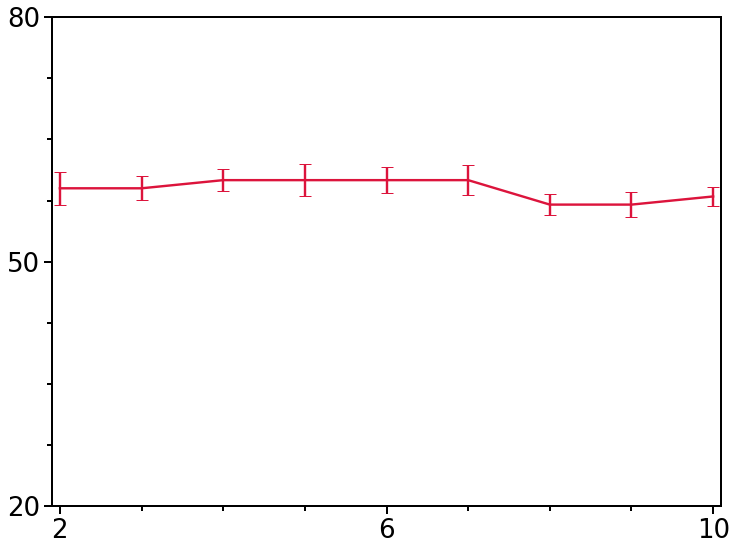

In [25]:
fig,ax=plt.subplots(1,figsize=(12,9))

ax.errorbar(range(2,11), ndiff_top200[:,0], yerr=ndiff_top200[:,1], ecolor='crimson', color='crimson', capsize=6, lw=2.4, )

ax.spines[:].set_linewidth(2)
ax.tick_params(labelsize=26, length=8, width=2)
ax.set_xticks([2,6,10])
ax.set_yticks([20, 50, 80])
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.tick_params(which='minor', length=5, width=2)
ax.set_xlim(1.9,10.1)

# leg=plt.legend(fontsize=26)
# leg.get_frame().set_alpha(0)
plt.show()

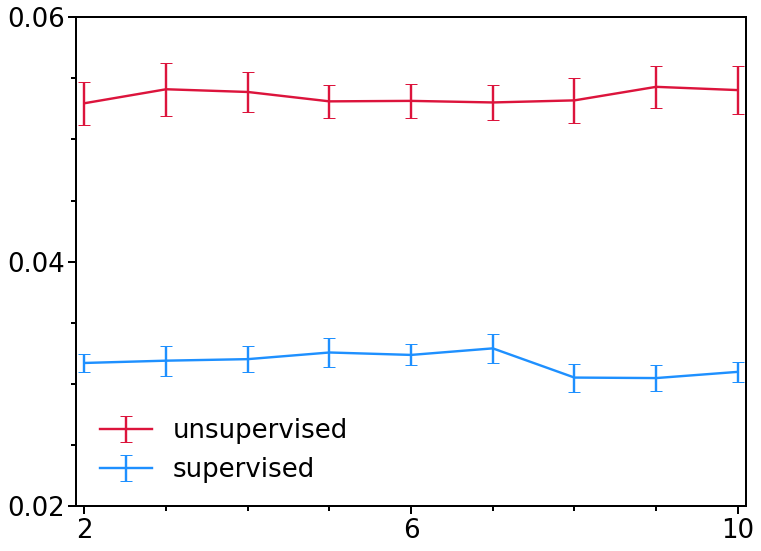

In [48]:
fig,ax=plt.subplots(1,figsize=(12,9))

ax.errorbar(range(2,11), sdiff_top200_permute[:,0], yerr=sdiff_top200_permute[:,1], 
            ecolor='crimson', color='crimson', capsize=6,lw=2.4, label='unsupervised' )
ax.errorbar(range(2,11), sdiff_top200_supervised[:,0], yerr=sdiff_top200_supervised[:,1], 
            ecolor='dodgerblue', color='dodgerblue', capsize=6, lw=2.4, label='supervised' )

ax.spines[:].set_linewidth(2)
ax.tick_params(labelsize=26, length=8, width=2)
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.tick_params(which='minor', length=5, width=2)

ax.set_xlim(1.9,10.1)
ax.set_xticks([2,6,10])
ax.set_ylim(0.02, 0.06)
ax.set_yticks([0.02, 0.04, 0.06])

leg=plt.legend(fontsize=26)
leg.get_frame().set_alpha(0)
plt.show()

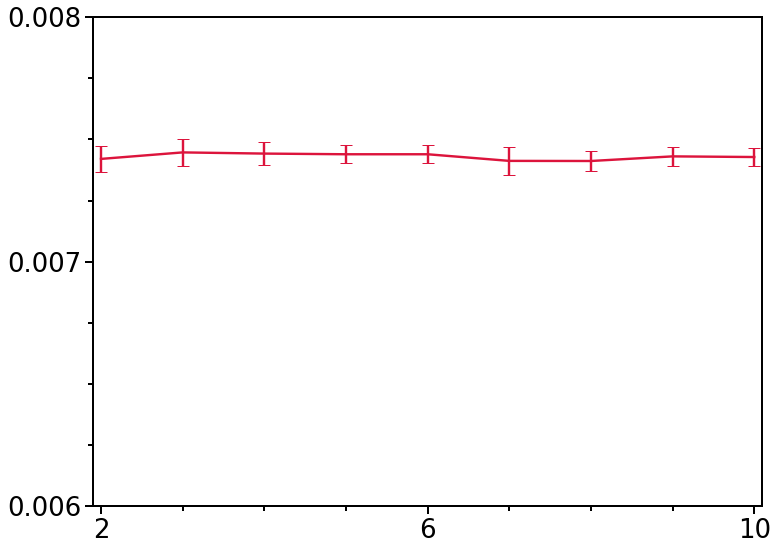

In [44]:
fig,ax=plt.subplots(1,figsize=(12,9))

ax.errorbar(range(2,11), sdiff_all[:,0], yerr=sdiff_all[:,1], ecolor='crimson', color='crimson', capsize=6, lw=2.4, )

ax.spines[:].set_linewidth(2)
ax.tick_params(labelsize=26, length=8, width=2)
ax.set_xticks([2,6,10])
ax.set_yticks([0.006, 0.007, 0.008])
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.tick_params(which='minor', length=5, width=2)
ax.set_xlim(1.9,10.1)

# leg=plt.legend(fontsize=26)
# leg.get_frame().set_alpha(0)
plt.show()

193
193
192
193
193


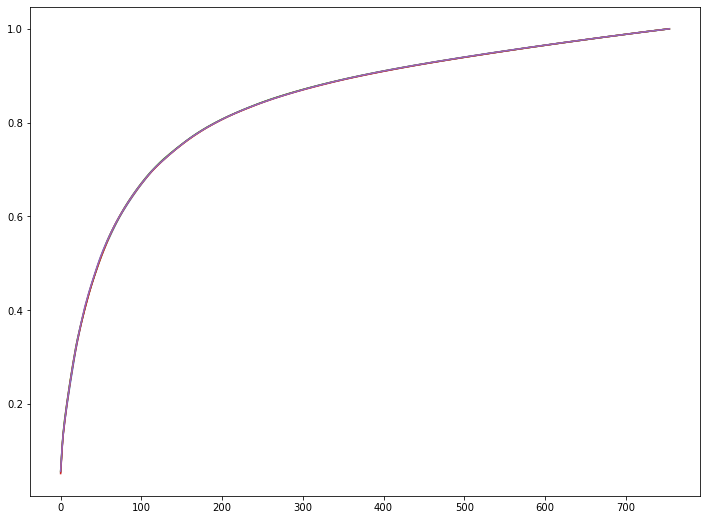

In [49]:
fig,ax=plt.subplots(1,figsize=(12,9))
for i in fsupervised:
    i = np.cumsum(i[i.argsort()[::-1]])
    print(np.where(i>=0.8)[0][0])
    ax.plot(i)

22
21
22
22
22


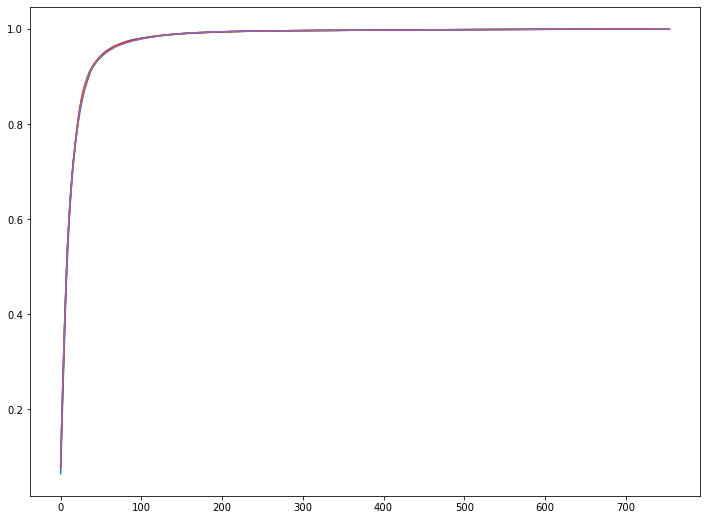

In [51]:
fig,ax=plt.subplots(1,figsize=(12,9))
for i in fpermute[5]:
    i = np.cumsum(i[i.argsort()[::-1]])
    print(np.where(i>=0.8)[0][0])
    ax.plot(i)